In [1]:
!wget "https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/3)%20Clustering%20Models/K-Means%20Clustering/Country-data.csv"

--2024-12-04 06:57:44--  https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/3)%20Clustering%20Models/K-Means%20Clustering/Country-data.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9229 (9.0K) [text/plain]
Saving to: ‘Country-data.csv’

Country-data.csv    100%[===================>]   9.01K  --.-KB/s    in 0s      

2024-12-04 06:57:44 (70.2 MB/s) - ‘Country-data.csv’ saved [9229/9229]



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import plotly.express as px

In [3]:
data = pd.read_csv('Country-data.csv')

In [4]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
numerical_data = data.drop(columns=["country"], errors='ignore')

In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

In [7]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

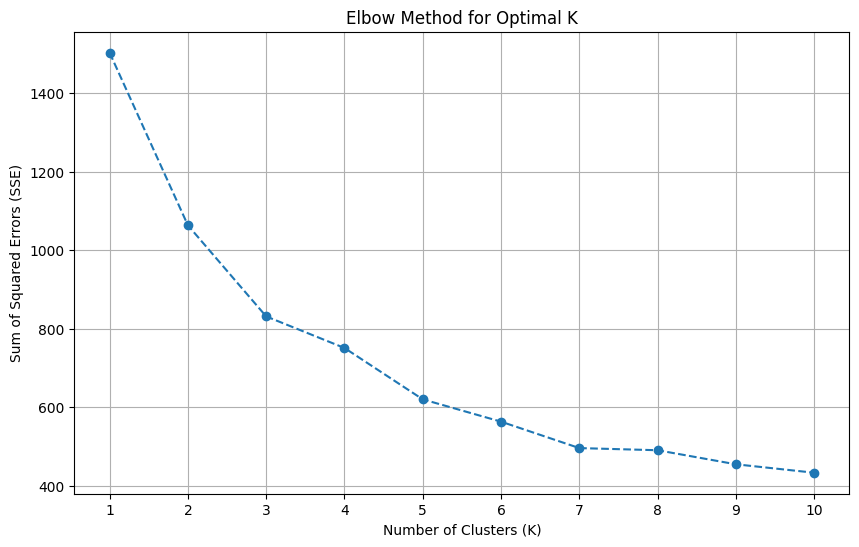

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(k_values,inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [9]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

In [10]:
silhouette = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score for KMeans with : {silhouette:.4f}")

Silhouette Score for KMeans with : 0.2856


In [11]:
data['Cluster'] = clusters

In [12]:
fig = px.scatter_3d(
    x=scaled_data[:, 0],
    y=scaled_data[:, 1],
    z=scaled_data[:, 2],
    color=clusters.astype(str),
    title=f"3D Visualization of KMeans Clusters",
    labels={'color': 'Cluster'}
)

fig.show()